# Import Statements 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image
import numpy as np
import seaborn as sns
import statsmodels.api as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier

In [2]:
df = pd.read_csv('C:/Users/TEJAS/Desktop/python exc/SydneyRain.csv', header = 0)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2/2/2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2/3/2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2/4/2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2/5/2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [5]:
df.shape

(3337, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [7]:
df = df.drop(["Evaporation","Cloud9am","Cloud3pm","Location","Date"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,Yes,Yes


In [8]:
df = df.dropna(axis = 0)
df.shape

(3271, 12)

In [9]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [11]:
df.head(10)

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,1,1
1,19.5,25.6,6.0,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,1,1
2,21.6,24.5,6.6,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,1,1
3,20.2,22.8,18.8,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,1,1
4,19.7,25.7,77.4,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,1,1
5,20.2,27.2,1.6,8.6,69.0,62.0,1002.7,998.6,23.8,26.0,1,1
6,18.6,26.3,6.2,5.2,75.0,80.0,999.0,1000.3,21.7,22.3,1,1
7,17.2,22.3,27.6,2.1,77.0,61.0,1008.3,1007.4,18.9,21.1,1,1
8,16.4,20.8,12.6,3.0,92.0,91.0,1006.4,1007.6,17.1,16.5,1,1
9,14.6,24.2,8.8,10.1,80.0,53.0,1014.0,1013.4,17.2,23.3,1,0


In [12]:
X = df.drop(['RainTomorrow'], axis = 1)
y= df['RainTomorrow']

In [13]:
X.head()

,MinTemp,MaxTemp,Rainfall,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,19.5,22.4,15.6,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,1
1,19.5,25.6,6.0,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,1
2,21.6,24.5,6.6,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,1
3,20.2,22.8,18.8,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,1
4,19.7,25.7,77.4,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,1


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow, dtype: int32

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

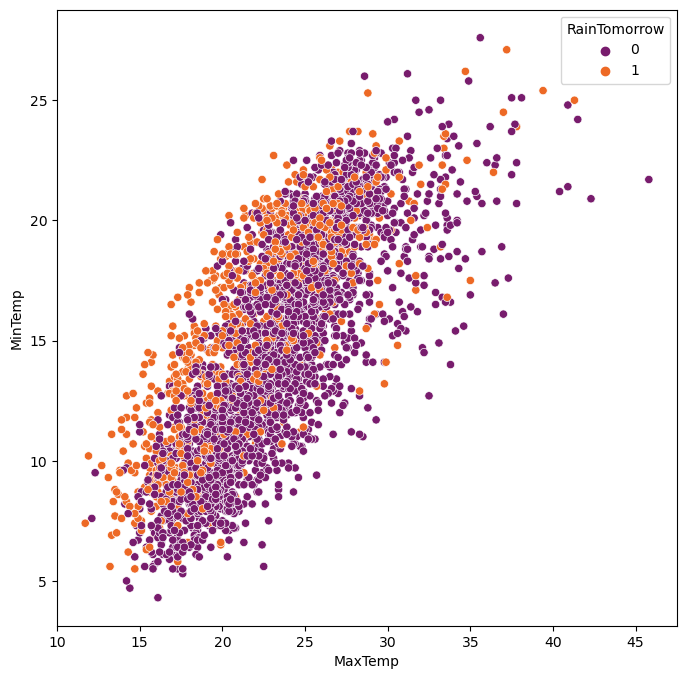

In [15]:
plt.figure(figsize =(8,8))
sns.scatterplot(x= 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = 'inferno', data = df)

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

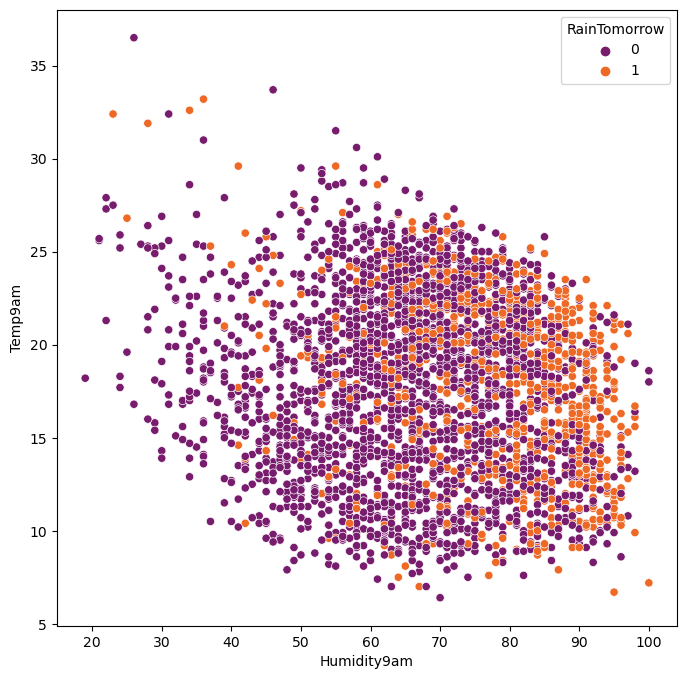

In [16]:
plt.figure(figsize =(8,8))
sns.scatterplot(x= 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow', palette = 'inferno', data = df)

               MinTemp   MaxTemp  Rainfall  Sunshine  Humidity9am  \
MinTemp       1.000000  0.771005  0.013995 -0.063475     0.053946   
MaxTemp       0.771005  1.000000 -0.139306  0.327422    -0.185382   
Rainfall      0.013995 -0.139306  1.000000 -0.308962     0.332636   
Sunshine     -0.063475  0.327422 -0.308962  1.000000    -0.490631   
Humidity9am   0.053946 -0.185382  0.332636 -0.490631     1.000000   
Humidity3pm   0.273269 -0.150741  0.305635 -0.586476     0.657933   
Pressure9am  -0.391654 -0.385853 -0.037561 -0.047789     0.262098   
Pressure3pm  -0.353334 -0.420375  0.001780 -0.094507     0.249202   
Temp9am       0.939307  0.858639 -0.054297  0.113891    -0.145944   
Temp3pm       0.753147  0.960805 -0.142748  0.345528    -0.155192   
RainToday     0.020618 -0.184585  0.556535 -0.367592     0.405176   
RainTomorrow  0.082804 -0.152525  0.296120 -0.529112     0.335966   

              Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  \
MinTemp          0.273269  

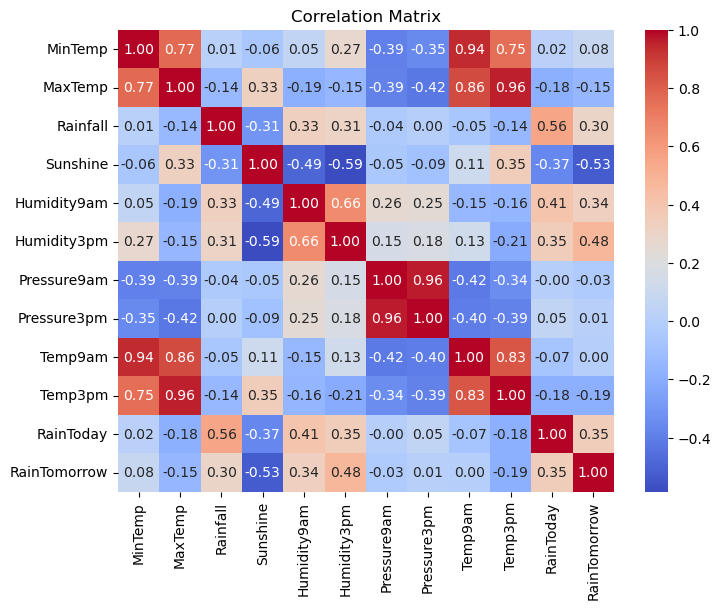

In [17]:
correlation_matrix = df.corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Logistic Regression

In [19]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
prediction = lr.predict(X_test)

In [21]:
prediction

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,

In [22]:
print(confusion_matrix(y_test,prediction ))

[[440  36]
 [ 85  94]]


In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       476
           1       0.72      0.53      0.61       179

    accuracy                           0.82       655
   macro avg       0.78      0.72      0.74       655
weighted avg       0.81      0.82      0.81       655



In [24]:
print(accuracy_score(y_test,prediction))

0.815267175572519


# Decision Tree Classifier

In [25]:
dt = DecisionTreeClassifier()

In [26]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
prediction = dt.predict(X_test)

In [28]:
print(confusion_matrix(y_test,prediction))

[[393  83]
 [ 81  98]]


In [29]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       476
           1       0.54      0.55      0.54       179

    accuracy                           0.75       655
   macro avg       0.69      0.69      0.69       655
weighted avg       0.75      0.75      0.75       655



In [30]:
print(accuracy_score(y_test,prediction))

0.749618320610687


# Random Forest Classifier

In [31]:
rf = RandomForestClassifier()

In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
prediction = rf.predict(X_test)

In [34]:
print(confusion_matrix(y_test,prediction))

[[444  32]
 [ 90  89]]


In [35]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       476
           1       0.74      0.50      0.59       179

    accuracy                           0.81       655
   macro avg       0.78      0.71      0.74       655
weighted avg       0.81      0.81      0.80       655



In [36]:
print(accuracy_score(y_test,prediction))

0.8137404580152672


# XGBoost Classifier 

In [37]:
xgb = xgb.XGBClassifier()

In [38]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
prediction = xgb.predict(X_test)

In [40]:
print('matrix',confusion_matrix(y_test,prediction))

matrix [[435  41]
 [ 88  91]]


In [41]:
print('f1',classification_report(y_test,prediction))

f1               precision    recall  f1-score   support

           0       0.83      0.91      0.87       476
           1       0.69      0.51      0.59       179

    accuracy                           0.80       655
   macro avg       0.76      0.71      0.73       655
weighted avg       0.79      0.80      0.79       655



In [42]:
print('acc',accuracy_score(y_test,prediction))

acc 0.8030534351145038


# Logistic Regression is the best model for this data set

##  Logistic Regression

In [43]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
print(confusion_matrix(y_test,prediction ))
print(classification_report(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[440  36]
 [ 85  94]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       476
           1       0.72      0.53      0.61       179

    accuracy                           0.82       655
   macro avg       0.78      0.72      0.74       655
weighted avg       0.81      0.82      0.81       655

0.815267175572519


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
import pickle

file = open("RainTomorrow.pkl","wb")
pickle.dump(lr,file)
file.close()

In [45]:
import pickle
file = open("RainTomorrow.pkl","rb")
clf = pickle.load(file)
file.close()

In [46]:
MinTemp = float(input("Enter Minimum Temperature: "))
MaxTemp = float(input("Enter Maximum Temperature: "))
Rainfall = float(input("Enter Rainfall: "))
Sunshine = float(input("Enter Sunshine: "))
Humidity9am = float(input("Enter Humidity at 9am: "))
Humidity3pm = float(input("Enter Humidity at 3pm: "))
Pressure9am = float(input("Enter Pressure at 9am: "))
Pressure3pm = float(input("Enter Pressure at 3pm: "))
Temp9am = float(input("Enter Temperature at 9am: "))
Temp3pm = float(input("Enter Temperature at 3pm: "))
RainToday = float(input("Enter RainToday: "))
input_features = [
    [MinTemp, MaxTemp, Rainfall, Sunshine, Humidity9am, Humidity3pm, Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday]
]
RainTomorrow_pred = clf.predict(input_features)
print ("Rain Tomorrow :")
print (RainTomorrow_pred)
if RainTomorrow_pred ==0 :
    print ("No Rain Tomorrow")
else :
    print ("Tomorrow Will Be Raining")

Enter Minimum Temperature: 19.5
Enter Maximum Temperature: 22.4
Enter Rainfall: 15.6
Enter Sunshine: 0.0
Enter Humidity at 9am: 92.0
Enter Humidity at 3pm: 84.0
Enter Pressure at 9am: 1017.6
Enter Pressure at 3pm: 1017.4
Enter Temperature at 9am: 20.7
Enter Temperature at 3pm: 20.9
Enter RainToday: 1
Rain Tomorrow :
[1]
Tomorrow Will Be Raining


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#  Questions

### Q1. Your views about the problem statement? 

Ans :- 
    
The problem statement presents an interesting and practical scenario where machine learning can be applied to improve the accuracy of weather predictions, specifically rainfall in Sydney. It's a well-defined problem with a clear objective: to create a machine learning model using various classification techniques, including decision trees and ensemble methods, to predict rainfall accurately.

The context provided about "The Daily Buzz" and its new column, "The Weather Oracle," adds a realistic touch to the problem, making it relatable and emphasizing the potential impact of accurate weather predictions on the community. The dataset includes relevant weather features, such as temperature, humidity, and pressure, which are crucial for predicting rainfall.

The focus on using ensemble methods like Random Forest and Logistic Regression is appropriate, as these techniques often outperform individual models and can handle complex relationships in the data. The instructions also guide towards a systematic approach, including data preprocessing, model training, and evaluation using accuracy and confusion matrix metrics.









### Q2. What will be your approach to solving this task?

Ans :-
    
To approach the task of predicting rainfall in Sydney using machine learning, I would follow a systematic workflow. Here is the step-by-step approach:

(1) Data Loading and Exploration:

Load the dataset into a pandas DataFrame.
Explore the basic information about the dataset using info() and describe() functions.
Understand the distribution of the target variable ('RainTomorrow').


(2) Data Preprocessing:

Handle missing values: Decide on an imputation strategy or drop rows/columns with missing values.
Convert categorical variables to numerical using one-hot encoding.
Explore and address any outliers in numerical features.
Split the data into features (X) and target variable (y).


(3) Train-Test Split:

Split the data into training and testing sets to evaluate the model's performance on unseen data.


(4) Model Training:

Train a Logistic Regression as the base model.
Train a Decision Tree Classifier, Random Forest Classifier, and XGBoost Classifier.
Evaluate each model's accuracy on the test set.


(5)Create confusion matrices for each model to analyze false positives and false negatives.
Compare accuracy scores and choose the best-performing model.


(6) Further Improvements:

Hyperparameter tuning: Optimize hyperparameters for the selected model.
Feature engineering: Experiment with creating new relevant features.
Experiment with different imputation methods for handling missing values.
Explore other ensemble methods or consider stacking models.
Consider collecting more data to improve model generalization.


(7) Communication:

Clearly communicate the results, including any limitations or areas for improvement, to stakeholders at "The Daily Buzz."


This approach ensures a structured and systematic way of solving the problem, allowing for effective model comparison, selection, and potential improvements. The iterative nature of machine learning allows for refinement and fine-tuning based on the model's performance.

### Q3. What were the available ML model options you had to perform this task 

Ans :-
    
For predicting rainfall in Sydney, several machine learning models can be considered. In this context, the problem involves classification, where the goal is to predict whether it will rain the next day based on various weather features. Here are some of the ML model options suitable for this task:

(1) Logistic Regression:

Logistic Regression is a linear model for binary classification. It's well-suited for problems where the relationship between the features and the target variable is approximately linear.


(2) Random Forest Classifier:

Random Forest is an ensemble method that builds multiple decision trees and combines their predictions, providing better accuracy and robustness.


(3) XGBoost Classifier:

XGBoost (Extreme Gradient Boosting) is a powerful ensemble learning algorithm that has gained popularity for its efficiency and high performance. It builds a series of decision trees and combines their predictions.


It's also worth mentioning that there are other classification algorithms that could be considered, such as Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), and Neural Networks. However, the choice of models often depends on the characteristics of the dataset and the specific requirements of the problem at hand. The models mentioned above are commonly used for weather prediction tasks due to their flexibility and performance.

### Q4. Which model’s performance is best and what could be the possible reason for that?

Ans :- 
    
The Logistic Regression model is performing the best on your weather dataset, it's important to understand the potential reasons for its superior performance. Here are some possible explanations:


(1) Linear Relationships:

Logistic Regression works well when the relationship between the features and the target variable is approximately linear. If the weather features in your dataset exhibit linear patterns with the likelihood of rainfall, Logistic Regression could be an effective choice.


(2) Interpretability:

Logistic Regression provides a straightforward interpretation of the model coefficients. This can be valuable for understanding the impact of each feature on the probability of rainfall. In scenarios where interpretability is crucial, Logistic Regression may be preferred over more complex models.


(3) Feature Importance:

Logistic Regression coefficients indicate the strength and direction of the relationship between each feature and the target variable. You can easily identify which features contribute more or less to the prediction, aiding in feature importance analysis.


(4) Less Prone to Overfitting:

Logistic Regression is a simple model with fewer parameters compared to ensemble methods like Random Forest or XGBoost. In situations with limited data, Logistic Regression might be less prone to overfitting.


(5) Efficiency:

Logistic Regression typically requires less computational resources for training and prediction compared to ensemble methods. If computational efficiency is a consideration, Logistic Regression can be a suitable choice.


(6) Balanced Dataset:

Logistic Regression can perform well when dealing with a balanced dataset. If the classes (rain, no rain) are relatively balanced, Logistic Regression may yield good results.




### Q5. What steps can you take to improve this selected model’s performance even further? 

Ans :-
    
To further improve the performance of the selected Logistic Regression model

(1) Feature Engineering:

Experiment with creating new features that might capture more complex relationships in the data.


(2) Handling Outliers:

Investigate and handle outliers in the dataset, as they might affect the performance of Logistic Regression. You can use statistical methods or domain knowledge to identify and address outliers.


(3) Normalization/Scaling:

Ensure that numerical features are appropriately scaled. Logistic Regression can benefit from feature scaling, especially if features are on different scales.


(4) Data Quality:

Ensure data quality by thoroughly cleaning and pre-processing the data. Address missing values, correct inconsistencies, and handle any anomalies in the dataset.


(5) Collect More Data:

If possible, consider collecting more data. Additional data can provide the model with more information to generalize better.


